线性回归是最基本的机器学习算法之一，用于预测一个连续值。

线性回归是一种简单且常见的回归分析方法，目的是通过拟合一个线性函数来预测输出。

对于一个简单的线性回归问题:  $y=w_1x_1+w_2x_2+...+w_nx_n+b$

In [2]:
%matplotlib inline

In [3]:
# 我们首先准备一些假数据，用于训练我们的线性回归模型。这里，我们可以生成一个简单的线性关系的数据集，其中每个样本有两个特征 x1，x2
import torch
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# 本行代码确保matplotlib能在jupyter notebook 中正常运行，notebook有时候会发生kernel崩溃
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

In [5]:
# 随机种子，确保每次运行结果一致
torch.manual_seed(66)

# 生成训练数据
# 创建了一个带有噪声的线性数据集，输入 X 为 100x2 的矩阵，每个样本有两个特征，输出 Y 由真实的权重和偏置生成，并加上了一些随机噪声。
X = torch.randn(100, 2)
true_w = torch.tensor([2.0, 3.0])
true_b = 4
Y = X @ true_w + true_b + torch.randn(100) * .01 #加入一些随机噪声

print(X[:5])
print(Y[:5])

tensor([[ 0.2142, -0.1434],
        [-0.2636,  1.2033],
        [ 1.0941,  0.7960],
        [ 0.0044, -1.5482],
        [-1.1537, -0.1612]])
tensor([ 3.9935,  7.0707,  8.5842, -0.6329,  1.1973])


In [6]:
# 通过继承 nn.Module 来定义一个简单的线性回归模型。在 PyTorch 中，线性回归的核心是 nn.Linear() 层，它会自动处理权重和偏置的初始化。
import torch.nn as nn

# 定义线性回归模型
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(2,1)
    def forward(self, x):
        return self.linear(x)

model = LinearRegression()

In [7]:
# 定义损失函数和优化器
loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [8]:
# # 训练模型

# 在训练过程中，我们将执行以下步骤：
# 使用输入数据 X 进行前向传播，得到预测值。
# 计算损失（预测值与实际值之间的差异）。
# 使用反向传播计算梯度。
# 更新模型参数（权重和偏置）。
# 我们将训练模型 1000 轮，并在每 100 轮打印一次损失。

num_epochs = 1000
for epoch in range(num_epochs):
    model.train()

    #前向传播
    predictions = model(X)
    loss = loss_fn(predictions.squeeze(), Y)

    # 反向传播
    optimizer.zero_grad() #清空之前梯度
    loss.backward()  #计算梯度
    optimizer.step()  #更新模型参数

    #打印损失
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/1000], Loss:{loss.item():.4f}')

Epoch [100/1000], Loss:21.7908
Epoch [200/1000], Loss:14.0962
Epoch [300/1000], Loss:9.1520
Epoch [400/1000], Loss:5.9626
Epoch [500/1000], Loss:3.8972
Epoch [600/1000], Loss:2.5551
Epoch [700/1000], Loss:1.6799
Epoch [800/1000], Loss:1.1074
Epoch [900/1000], Loss:0.7318
Epoch [1000/1000], Loss:0.4847


In [9]:
# 评估模型
# 训练完成后，我们可以通过查看模型的权重和偏置来评估模型的效果。我们还可以在新的数据上进行预测并与实际值进行比较。

# 查看训练后的权重和偏置
print(f'Predicted weight: {model.linear.weight.data.numpy()}')
print(f'Predicted bias: {model.linear.bias.data.numpy()}')

Predicted weight: [[1.9024646 2.6901088]]
Predicted bias: [3.3914964]


In [10]:
# 在新数据上做预测
with torch.no_grad():  # 评估时不需要计算梯度
    predictions = model(X)

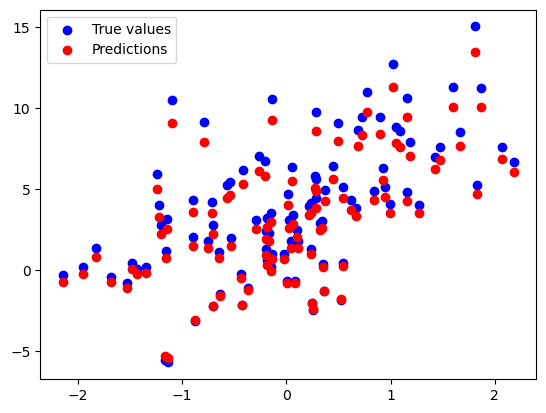

In [11]:
# 可视化预测与实际值
plt.scatter(X[:, 0], Y, color='blue', label='True values')
plt.scatter(X[:, 0], predictions, color='red', label='Predictions')
plt.legend()
plt.show()

In [12]:
# 检查内存使用情况
import psutil
process = psutil.Process()
print(f"当前内存使用情况: {process.memory_info().rss / (1024 * 1024)} MB")

当前内存使用情况: 358.16796875 MB
